# CS229, Fall 2017
## Problem Set 2: Deep Learning & Unsupervised Learning

This is my solutions for CS229 - Fall 2017: Machine Learning taught by Andrew Ng.

The material for Problem Set 2 is here: [ps2](https://github.com/nmduonggg/ML-CS229/blob/master/Problem%20Set%202/ps2.pdf)

This notebook contains the solution for __Question 1: Simple Neural Networks__

### Question 1.a)

Derivative of $L = \frac{1}{m} \sum_{i=1}^m (o^{(i)} - y^{(i)})^2$ is as complex as $l = (o^{i} - y^i)^2$. Then we consider:

$$
\begin{align*}
    \frac{\partial l}{\partial w_{1,2}^{[1]}} &= \frac{\partial l}{\partial o}.\frac{\partial o}{\partial z^{[2]}}.\frac{\partial z^{[2]}}{\partial a^{[1]}}.\frac{\partial a^{[1]}}{\partial z^{[1]}}.\frac{\partial z^{[1]}}{\partial w_{1,2}^{[1]}} \\
    &= 2(o - y)o(1-o) {w^{[2]}}^T a^{[1]}(1 - a^{[1]}) \times x_1 \\
    &= 2(o - y)o(1-o) {w^{[2]}}^T \sigma(w^{[1]}x + w_o^{[1]})(1 - \sigma(w^{[1]}x + w_o^{[1]})) \times x_1 \\
\end{align*}
$$

Then gradient descent should be:

$$w_{1,2}^{[1]} = w_{1,2}^{[1]} - \alpha \frac{1}{m} \sum_{i=1}^m \bigg[2(o^i - y^i)o^i(1-o^i) {w^{[2]}}^T \sigma(w^{[1]}x^i + w_o^{[1]})(1 - \sigma(w^{[1]}x^i + w_o^{[1]})) \times x^i_1 \bigg]$$

### Question 1.b)

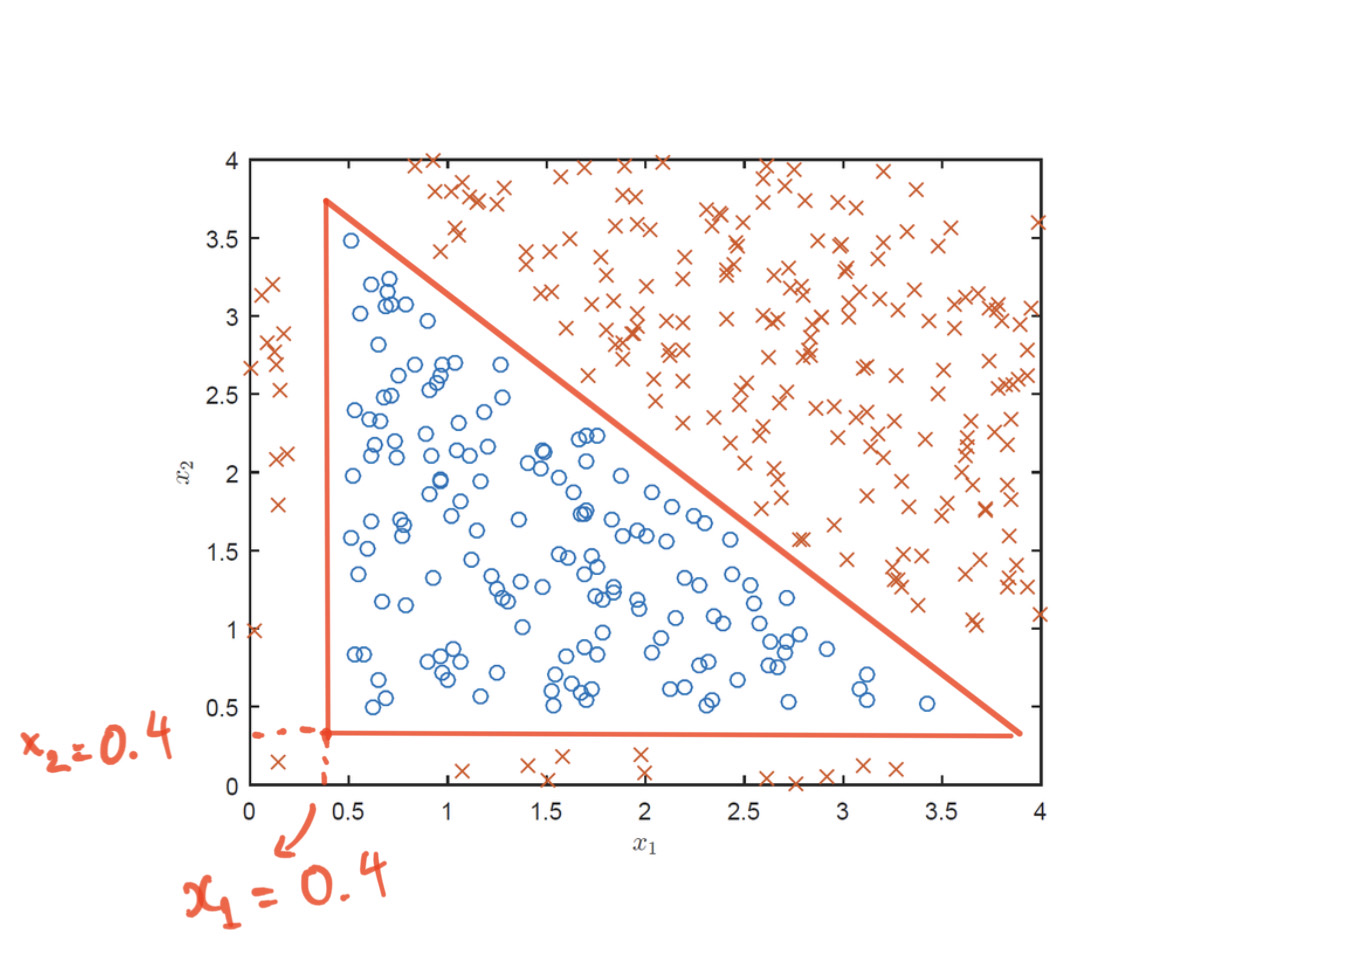

Our dataset can be perfectly separed using 3 sides of a triangle which corresponds to 3 neuron in the layer. With the usage of the step function $f(x)$:

$$f(x) = 1 \{x \geq 0\}$$

we need to define 3 linear function $w_0 + w_1 x_1 + w_2 x_2 = 0$ and via the step function, the example is classified based on whether or not is it below of under the line. 

From the lines above, we define 3 lines as follows:

$$
\begin{align*}
    & x_1 - 0.4 = 0 \\
    & x_2 - 0.4 = 0 \\
    & x_1 + x_2 - 4.25 = 0 \quad \text{(since it goes through (1.5, 2.75) and (2.5, 1.75))}
\end{align*}
$$

Input: 

$$X = (1 \quad x_1 \quad x_2)^T$$

Then the corresponding matrix in the first layer:

$$
W^{[1]} = 
\begin{bmatrix}
    -0.4 & 1 & 0 \\
    -0.4 & 0 & 1 \\
    -4.25 & 1 & 1 \\
\end{bmatrix}
$$

to form:

$$
\begin{align*}
    &z_1^{[1]} = x_1 - 0.4 \\
    &z_2^{[1]} = x_2 - 0.4 \\
    &z_3^{[1]} = x_1 + x_2 - 4.25
\end{align*}
$$


From the figure, an example $i$ is classified as 1 if and only if $(z_1 < 0) \land (z_2 < 0) \land (z_3 \geq 0)$, and classified as 0 when the opposite conditions held true which are $(z_1 \geq 0) \land (z_2 \geq 0) \land (z_3 < 0)$

With $a^{[1]} =  (1 \quad a_1 \quad a_2 \quad a_3)^T$ and since we are using the step function:

$$
\begin{bmatrix}
    1 \\ 0 \\ 0 \\ 1 
\end{bmatrix} \implies W^{[2]}a^{[1]} = 1
$$

and

$$
\begin{bmatrix}
    1 \\ 1 \\ 1 \\ 0 
\end{bmatrix} \implies W^{[2]}a^{[1]} = 0
$$

A very natural set of weights in second layer is $W^{[2]} = (0 \quad 0 \quad 0 \quad 1)$

### Question 1.c)

With the linear function $f(x) = x$ (also known as identity function), the architecture of neural networks will collapse and we end up with only one linear function. Since the dataset is non-linearly separated then using this way, there does not exist a set of weights that will the loss $0$.